<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/Trajectory_Clustering/Trajectory_Clustering(Vessel_Method)_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, cv2, glob, time, zipfile
import numpy as np

import matplotlib.pyplot as plt

# Set Constants

In [3]:
# Constants
WIDTH, HEIGHT = 64, 64

EXPERIMENT_DATA = {
    'name' : 'Trajectory_Clusetring(Vessel_Method)',
    'number' : '5',
    'date' : '02-28-2022',
    'description' : 'Get error of image(64x64)'
    }

ROOT_DIR = os.path.join('/content')

IMAGE_DIR = os.path.join(ROOT_DIR, 'Image_Files')

EXPERIMENT_DIR = os.path.join(ROOT_DIR, 'drive', 'MyDrive', '1_University', 'PiLab', 'Experiment')
DATA_DIR = os.path.join(EXPERIMENT_DIR, 'Data')
RESULT_DIR = os.path.join(EXPERIMENT_DIR, 'Results')

os.chdir(RESULT_DIR)
curr_result_name = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}_Results"
if (curr_result_name not in os.listdir()):
    os.mkdir(curr_result_name)

CURR_RESULT_DIR = os.path.join(RESULT_DIR, curr_result_name)
os.chdir(CURR_RESULT_DIR)

with open('Description.txt', 'w') as f:
    f.write(EXPERIMENT_DATA['description'])

plt.gray()

print(f'ROOT_DIR:        {ROOT_DIR}')
print(f'IMAGE_DIR:       {IMAGE_DIR}')
print(f'EXPERIMENT_DIR:  {EXPERIMENT_DIR}')
print(f'DATA_DIR:        {DATA_DIR}')
print(f'RESULT_DIR:      {RESULT_DIR}')

ROOT_DIR:        /content
IMAGE_DIR:       /content/Image_Files
EXPERIMENT_DIR:  /content/drive/MyDrive/1_University/PiLab/Experiment
DATA_DIR:        /content/drive/MyDrive/1_University/PiLab/Experiment/Data
RESULT_DIR:      /content/drive/MyDrive/1_University/PiLab/Experiment/Results


<Figure size 432x288 with 0 Axes>

In [4]:
os.chdir(ROOT_DIR)
zipfile.ZipFile(DATA_DIR + "/Image_Files.zip").extractall(ROOT_DIR)

# Load and Preprocessing Data

In [5]:
os.chdir(IMAGE_DIR)
file_names = sorted(glob.glob('*png'))

In [6]:
train_images = []
for file in file_names:
    src = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    dst = cv2.resize(src, dsize=(0, 0), fx=WIDTH/256, fy=HEIGHT/256, interpolation=cv2.INTER_LINEAR)
    train_images.append(dst)

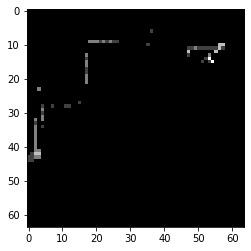

(64, 64)


In [7]:
plt.imshow(train_images[0])
plt.show()
print(train_images[0].shape)

In [8]:
X_train = np.array( train_images ).astype( 'float32' ) / 255.
X_train = np.reshape( X_train, ( -1, HEIGHT, WIDTH, 1 ) )

In [9]:
print( X_train.shape )

(18670, 64, 64, 1)


# Test Model

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
os.chdir(DATA_DIR)

encoder = keras.models.load_model('encoder(vessel_64).h5')
encoder.summary()

os.chdir(CURR_RESULT_DIR)

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        4624

In [12]:
low_dimension_data, prevIdx = [ ], 0
for i in range(0, len(X_train), 1000):
    low_dimension_data.extend(encoder(X_train[prevIdx:i]))
    prevIdx = i
low_dimension_data.extend(encoder(X_train[prevIdx:]))

low_dimension_data = np.array(low_dimension_data)
print(X_train.shape)
print(low_dimension_data.shape)

(18670, 64, 64, 1)
(18670, 256)


In [13]:
groups = ['Geolife_trajectory218.png',  'Geolife_trajectory357.png', 'Geolife_trajectory507.png', 'Geolife_trajectory1434.png', 'Geolife_trajectory1875.png', 'Geolife_trajectory3676.png']

0.0 Geolife_trajectory218.png
0.016150593757629395 Geolife_trajectory242.png
0.02168363332748413 Geolife_trajectory231.png
0.032667577266693115 Geolife_trajectory220.png
0.03460615873336792 Geolife_trajectory217.png
0.04274791479110718 Geolife_trajectory223.png
0.04304015636444092 Geolife_trajectory189.png
0.04616934061050415 Geolife_trajectory188.png
0.04728513956069946 Geolife_trajectory221.png
0.06104201078414917 Geolife_trajectory195.png


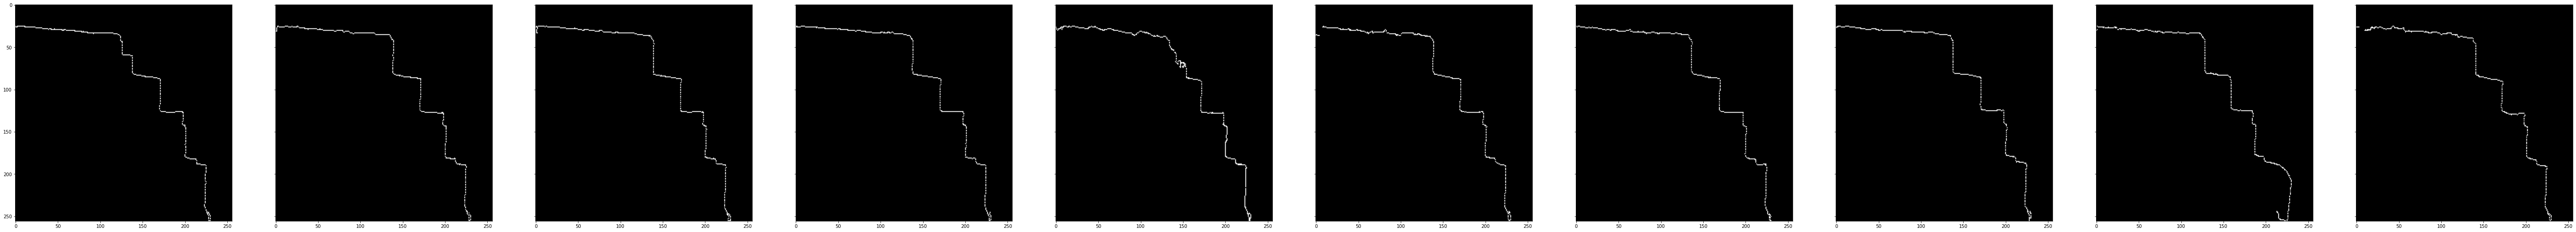

0.0 Geolife_trajectory357.png
0.05113857984542847 Geolife_trajectory373.png
0.06493163108825684 Geolife_trajectory361.png
0.06514495611190796 Geolife_trajectory388.png
0.06585782766342163 Geolife_trajectory390.png
0.06729787588119507 Geolife_trajectory382.png
0.06767094135284424 Geolife_trajectory395.png
0.07040822505950928 Geolife_trajectory266.png
0.07115721702575684 Geolife_trajectory251.png
0.07272255420684814 Geolife_trajectory394.png


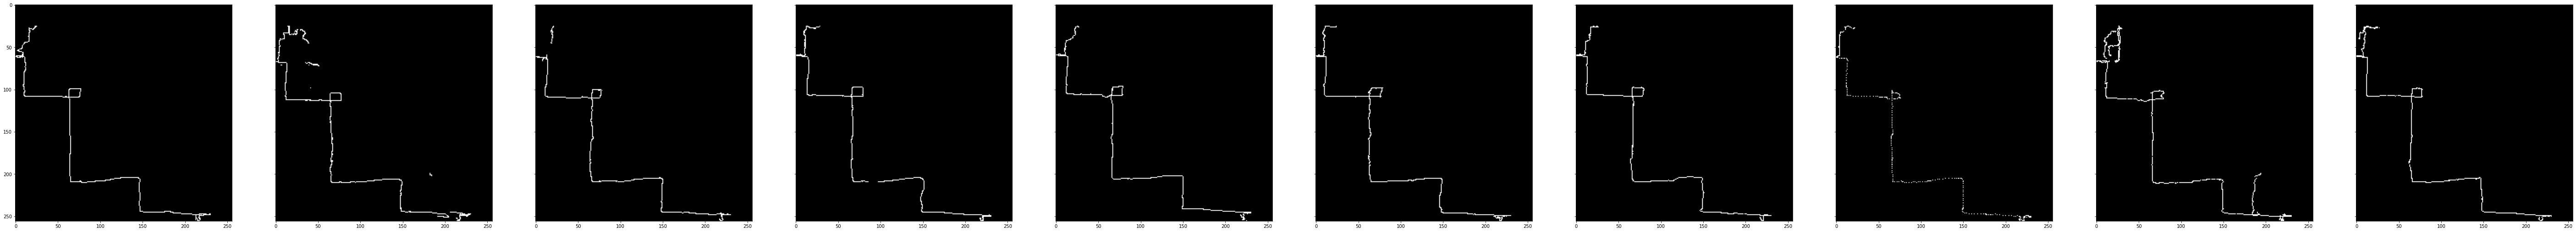

0.0 Geolife_trajectory507.png
0.08456248044967651 Geolife_trajectory11173.png
0.08456248044967651 Geolife_trajectory18262.png
0.08572763204574585 Geolife_trajectory2599.png
0.08603531122207642 Geolife_trajectory9046.png
0.09076076745986938 Geolife_trajectory456.png
0.0910915732383728 Geolife_trajectory1411.png
0.10909765958786011 Geolife_trajectory18033.png
0.1121034026145935 Geolife_trajectory18048.png
0.12379002571105957 Geolife_trajectory2223.png


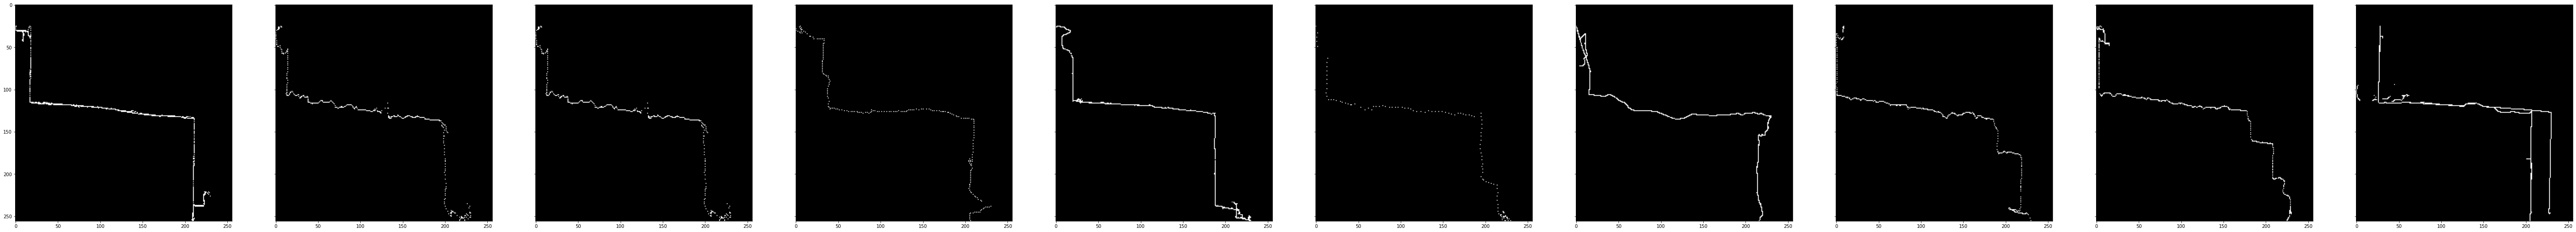

0.0 Geolife_trajectory1434.png
0.013492465019226074 Geolife_trajectory6487.png
0.04670780897140503 Geolife_trajectory1428.png
0.06603419780731201 Geolife_trajectory1544.png
0.07653021812438965 Geolife_trajectory8115.png
0.09018725156784058 Geolife_trajectory3286.png
0.09115427732467651 Geolife_trajectory16588.png
0.09115427732467651 Geolife_trajectory17481.png
0.0942232608795166 Geolife_trajectory5321.png
0.09432744979858398 Geolife_trajectory11786.png


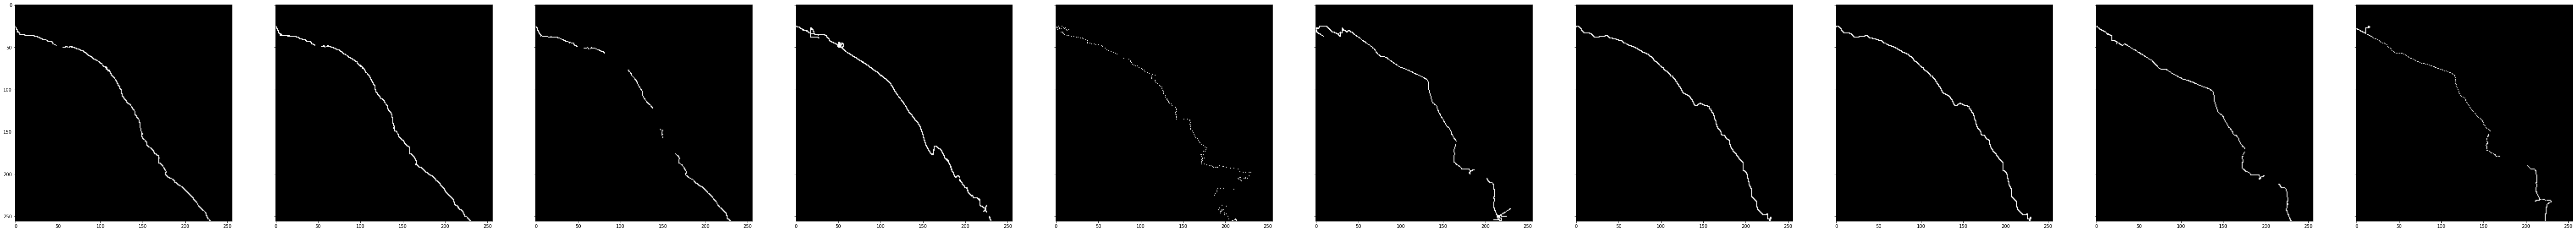

0.0 Geolife_trajectory1875.png
0.023550748825073242 Geolife_trajectory1845.png
0.03278696537017822 Geolife_trajectory1913.png
0.06876170635223389 Geolife_trajectory1907.png
0.07391184568405151 Geolife_trajectory1957.png
0.08308058977127075 Geolife_trajectory1883.png
0.08619135618209839 Geolife_trajectory1930.png
0.10026037693023682 Geolife_trajectory6249.png
0.10533779859542847 Geolife_trajectory1894.png
0.12833338975906372 Geolife_trajectory1887.png


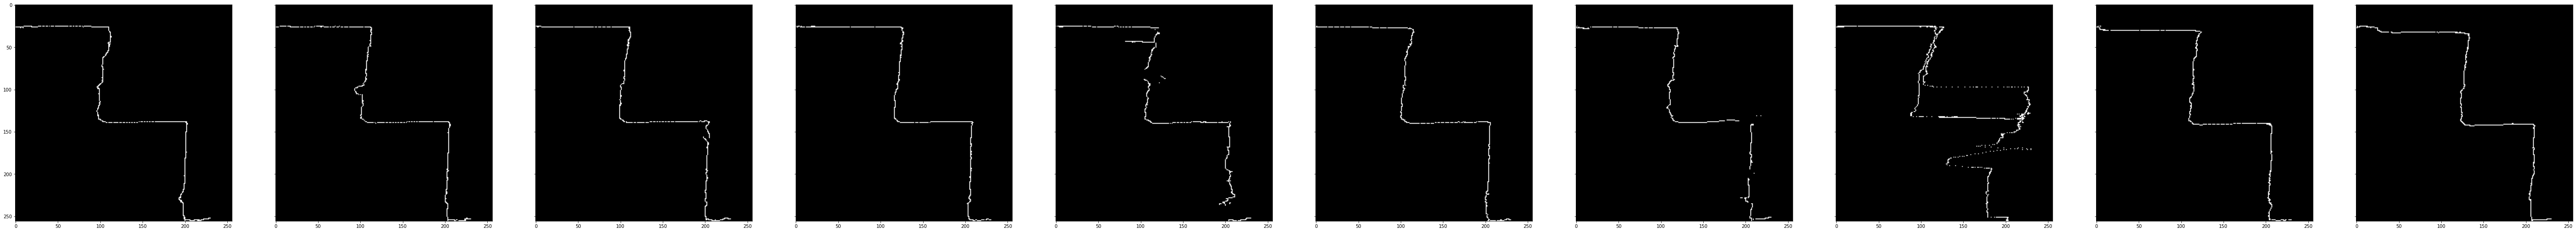

0.0 Geolife_trajectory3676.png
0.027130484580993652 Geolife_trajectory3686.png
0.04578310251235962 Geolife_trajectory3720.png
0.0546116828918457 Geolife_trajectory3881.png
0.06648087501525879 Geolife_trajectory3706.png
0.07047814130783081 Geolife_trajectory3818.png
0.07509541511535645 Geolife_trajectory3669.png
0.07871603965759277 Geolife_trajectory3790.png
0.08214867115020752 Geolife_trajectory3838.png
0.0825534462928772 Geolife_trajectory3848.png


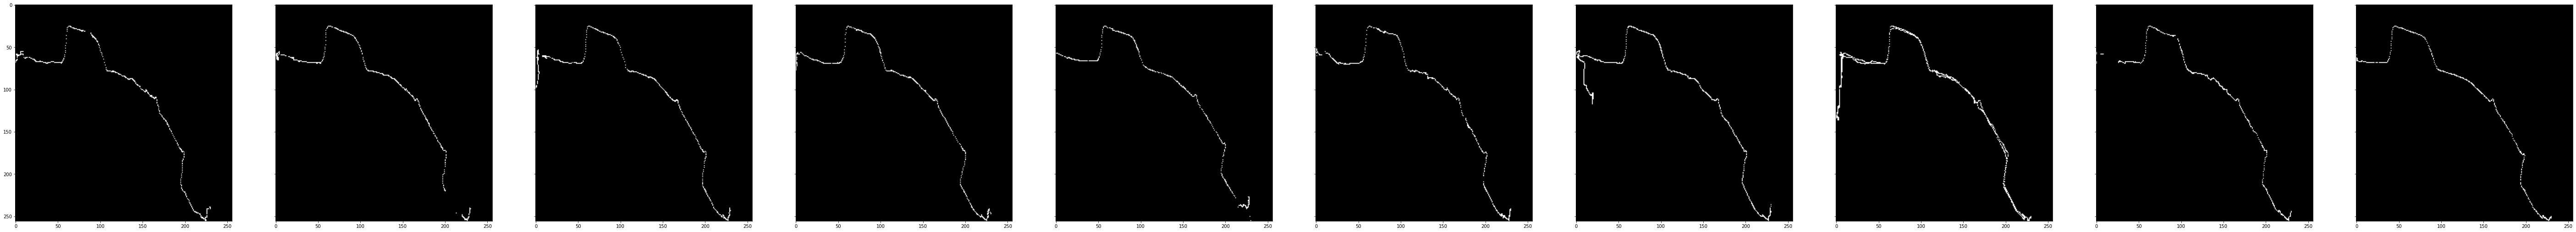

In [14]:
from scipy.spatial import distance

os.chdir(CURR_RESULT_DIR)

similarities = []
for sim_idx, target_name in enumerate(groups):
    target_idx = file_names.index(target_name)

    similarities.append([])
    for i, low in enumerate(low_dimension_data):
        similarities[sim_idx].append((distance.cosine(low_dimension_data[target_idx], low), file_names[i]))

    similarities[sim_idx].sort(key = lambda x: x[0])
    for i in range(10):
        print(similarities[sim_idx][i][0], similarities[sim_idx][i][1])
    
    os.chdir(IMAGE_DIR)
    fig, ax = plt.subplots(1, 10, sharex = True, sharey = True, figsize = (100, 10))
    for i in range(10):
        images = cv2.imread(similarities[sim_idx][i][1], cv2.IMREAD_GRAYSCALE)
        ax[i].imshow(images)

    os.chdir(CURR_RESULT_DIR)
    plt.savefig(f'Similar_trajectories_with({sim_idx}).png', dpi = 300)
    plt.show()

In [15]:
import pandas as pd

os.chdir(CURR_RESULT_DIR)
for similarity in similarities:
    df = pd.DataFrame(similarity, columns = ['Cosine Similarity', 'File Name'])
    print(df.head())

    file_number = similarity[0][1].split('_')[1].split('.')[0][len('trajectory'):]
    df.to_csv(f'Error_of_{file_number}.csv')

   Cosine Similarity                  File Name
0           0.000000  Geolife_trajectory218.png
1           0.016151  Geolife_trajectory242.png
2           0.021684  Geolife_trajectory231.png
3           0.032668  Geolife_trajectory220.png
4           0.034606  Geolife_trajectory217.png
   Cosine Similarity                  File Name
0           0.000000  Geolife_trajectory357.png
1           0.051139  Geolife_trajectory373.png
2           0.064932  Geolife_trajectory361.png
3           0.065145  Geolife_trajectory388.png
4           0.065858  Geolife_trajectory390.png
   Cosine Similarity                    File Name
0           0.000000    Geolife_trajectory507.png
1           0.084562  Geolife_trajectory11173.png
2           0.084562  Geolife_trajectory18262.png
3           0.085728   Geolife_trajectory2599.png
4           0.086035   Geolife_trajectory9046.png
   Cosine Similarity                   File Name
0           0.000000  Geolife_trajectory1434.png
1           0.013492  Geol